In [8]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [11]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])


In [13]:
df_market_data_scaled

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [22]:
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [14]:
# Create a DataFrame with the scaled data
df_market_data_transformed = pd.DataFrame(df_market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

In [15]:
df_market_data_transformed

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


In [16]:
# Create a DataFrame with the scaled data
df_market_data_transformed = pd.DataFrame(df_market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Use the index from df_market_data as the index for df_market_data_transformed
df_market_data_transformed.index = df_market_data.index

# Display sample data
print(df_market_data_transformed.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [18]:
# Create a list with the number of k-values from 1 to 11
inertia = []

# Create a list to store the values of k
k = list(range(1, 11))


In [19]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [20]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


In [21]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4 (or 5, but leaning more towards 4)

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [22]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [23]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [24]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_lower = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
k_lower

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [25]:
print(k_lower[:5])

[3 3 1 1 3]


In [26]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_transformed['clusters_lower'] = k_lower

# Display sample data
df_market_data_transformed.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters_lower
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [27]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_transformed.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters_lower"
).opts(yformatter="%.0f")

:NdOverlay   [clusters_lower]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [28]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [29]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_transformed = pca_model.fit_transform(df_market_data_transformed)

# Convert the transformed data into a DataFrame
pca_df = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the transformed DataFrame
print(pca_df.head())


        PC1       PC2       PC3
0 -1.585139  0.134394  0.545621
1 -1.322581  0.054494  1.115709
2  0.266335 -0.536409 -0.796946
3  0.257225 -0.592013 -0.646529
4 -2.952250  0.422372  1.267894


In [30]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f"Variance explained by PC{i+1}: {variance:.2%}")

Variance explained by PC1: 37.01%
Variance explained by PC2: 32.32%
Variance explained by PC3: 19.12%


In [56]:
.3701+.3232+.1912

0.8845000000000001

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 88.45%

In [33]:
# Create a new DataFrame with the PCA data
df_market_data_pca = pd.DataFrame(data=pca_transformed, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_market_data_pca['coinid'] = df_market_data_transformed.iloc[:, 0]  # Use iloc to access the first column

# Set the coinid column as index
df_market_data_pca.set_index('coinid', inplace=True)

# Display sample data
print(df_market_data_pca.head())


             PC1       PC2       PC3
coinid                              
NaN    -1.585139  0.134394  0.545621
NaN    -1.322581  0.054494  1.115709
NaN     0.266335 -0.536409 -0.796946
NaN     0.257225 -0.592013 -0.646529
NaN    -2.952250  0.422372  1.267894


---

### Find the Best Value for k Using the PCA Data

In [34]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))


In [35]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k)
    
    # 2. Fit the model to the data using df_market_data_pca
    kmeans_model.fit(df_market_data_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': range(1, 12), 'inertia_values': inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


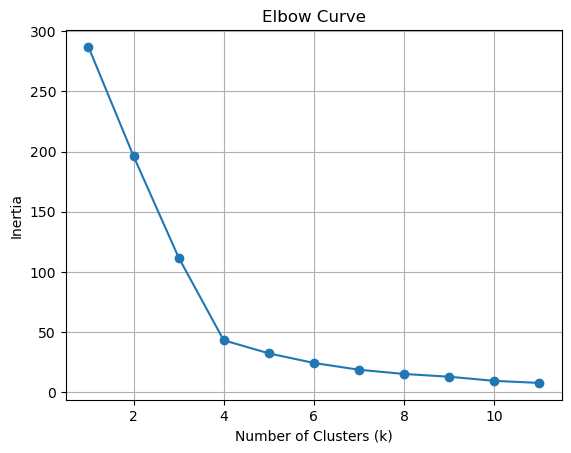

In [39]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
#elbow_plot_pca = elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
import matplotlib.pyplot as plt
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')

# Add labels and title
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, they are both around 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [40]:
# Initialize the K-Means model using the best value for k
best_kmeans_model = KMeans(n_clusters=4)

In [41]:
# Fit the K-Means model using the PCA data
best_kmeans_model.fit(df_market_data_pca)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [42]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = best_kmeans_model.predict(df_market_data_pca)

# Print the resulting array of cluster values.
clusters

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 1, 0, 1, 1, 1, 1])

In [43]:
# Create a copy of the DataFrame with the PCA data

df_with_clusters = df_market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_with_clusters['predicted_cluster'] = clusters

# Display sample data
print(df_with_clusters.head())

             PC1       PC2       PC3  predicted_cluster
coinid                                                 
NaN    -1.585139  0.134394  0.545621                  2
NaN    -1.322581  0.054494  1.115709                  2
NaN     0.266335 -0.536409 -0.796946                  1
NaN     0.257225 -0.592013 -0.646529                  1
NaN    -2.952250  0.422372  1.267894                  2


In [44]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_plot = pd.DataFrame({
    'PC1': df_with_clusters['PC1'],
    'PC2': df_with_clusters['PC2'],
    'predicted_cluster': df_with_clusters['predicted_cluster'],
    'coinid': df_with_clusters.index  # Assuming 'coinid' is the index
})

# Define the hover_cols parameter to include the cryptocurrency names
hover_cols = ['coinid']

# Create the scatter plot
scatter_plot = df_plot.hvplot.scatter(x='PC1', y='PC2', by='predicted_cluster', hover_cols=hover_cols)

# Show the scatter plot
scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coinid)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [48]:
# Composite plot to contrast the Elbow curves

import hvplot.dask  # Import for composite plot support

# Create DataFrame for each elbow curve
elbow_df1 = pd.DataFrame({'k_values': range(1, 12), 'inertia_values': inertia_values})
elbow_df2 = pd.DataFrame({'k_values': range(1, 12), 'inertia_values': inertia_values})

# Create individual line plots for each elbow curve
plot1 = elbow_df1.hvplot.line(x='k_values', y='inertia_values', title='Elbow Curve 1')
plot2 = elbow_df2.hvplot.line(x='k_values', y='inertia_values', title='Elbow Curve 2')

# Display the composite plot
composite_plot = plot1 + plot2
composite_plot


:Layout
   .Curve.I  :Curve   [k_values]   (inertia_values)
   .Curve.II :Curve   [k_values]   (inertia_values)

In [46]:
# Composite plot to contrast the clusters

# Create DataFrame for each clustering result
cluster_df1 = df_with_clusters[df_with_clusters['predicted_cluster'] == 1]
cluster_df2 = df_with_clusters[df_with_clusters['predicted_cluster'] == 2]

# Create individual scatter plots for each clustering result
plot1 = cluster_df1.hvplot.scatter(x='PC1', y='PC2', hover_cols=['coinid'], title='Cluster 1')
plot2 = cluster_df2.hvplot.scatter(x='PC1', y='PC2', hover_cols=['coinid'], title='Cluster 2')

# Display the composite plot
composite_plot = plot1 + plot2
composite_plot


:Layout
   .Scatter.I  :Scatter   [PC1]   (PC2,coinid)
   .Scatter.II :Scatter   [PC1]   (PC2,coinid)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  Reducing the dimensionality of the data led to better clustering results